## Exploratory Data Analysis: Disclosing Insights
Welcome to the notebook for "Exploratory Data Analysis"! In this notebook, we'll use the powerful method of exploratory data analysis (EDA) to set out on a quest to find insights and patterns hidden inside our dataset. Exploratory data analysis is a vital step in the data analysis process that enables us to comprehend our information's organization, features, and connections. We may discover trends, spot abnormalities, and generate hypotheses about our data using visual and statistical techniques.
In this notebook, we will cover the following key topics:

1. Data Overview: Examine our dataset's structure, dimensions, and essential statistical summaries to grasp it thoroughly. We'll look at methods for summarizing and visualizing data to understand its general properties.
2. Data Visualization: Use various visualizations to investigate and comprehend the distribution, connections, and trends in our dataset. To visually evaluate our data, we will examine methods, including scatter plots, histograms, box plots, bar charts, and heat maps.
3. Data Relationships: Examine the connections between the variables in our dataset. We will investigate methods to find correlations, dependencies, and relationships between the attributes, which might offer insightful information for additional research.
4. Feature Engineering: Use feature engineering approaches to add new variables or extract valuable features from the data we already have. Increasing the breadth of our research may entail changing variables, developing interaction terms, or deriving new attributes.
5. Statistical Analysis: To verify assumptions, draw inferences, and draw meaningful conclusions from our data, perform statistical tests and analyses. We will investigate methods like hypothesis testing, t-tests, chi-square tests, and ANOVA to learn more about our dataset.

You will have a solid foundation in exploratory data analysis methods by the time you finish this notebook and a robust toolkit to find hidden patterns, trends, and relationships in your dataset.
So let's begin this thrilling exploration of exploratory data analysis and reveal the deep insights that our data hold.

For this notebook we will use the data that was cleaned on the Data Cleansing and Preprocessing. On this data, we will check how many MPG we could get using the avaiable features of the data. 

## Import the required library

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the data

In [2]:
filePath = 'data/cars_cleaned_07052023.csv'
data = pd.read_csv(filePath)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,bore,stroke,compression-ratio
0,18.000000,8,307.0,130,3504,12.0,US,3.47,2.68,9.0
1,16.000000,8,304.0,150,3433,12.0,US,3.19,3.40,10.0
2,17.000000,8,302.0,140,3449,10.5,US,3.19,3.40,8.0
3,14.000000,8,454.0,220,4354,9.0,US,3.19,3.40,8.5
4,23.551429,8,440.0,215,4312,8.5,US,3.19,3.40,8.5


In [9]:
# Get the mean displacement
dis_mean = data['Displacement'].mean()

# Get the mean Horsepower
hors_mean = data['Horsepower'].mean()

# Get the mean Acceleration
acce_mean = data['Acceleration'].mean()
# Get the mean stroke
str_mean = data['stroke'].mean()

print('The average for the Displacement is: {:.2f}\
\nAverage Horsepower is: {:.2f}\
\nAverage Acceleration is: {:.2f}\
\nAverage stroke is: {:.2}'\
      .format(dis_mean,hors_mean,acce_mean,str_mean))

The average for the Displacement is: 192.18
Average Horsepower is: 103.65
Average Acceleration is: 15.57
Average stroke is: 3.3


In [10]:
# Get the discription of the data
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,bore,stroke,compression-ratio
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,3.305685,3.291137,10.358966
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,0.270153,0.264901,4.321490
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,2.540000,2.070000,3.390000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,3.080000,3.150000,8.600000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,3.270000,3.350000,9.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,3.580000,3.400000,9.400000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,3.940000,4.170000,23.000000


## Data Visualization

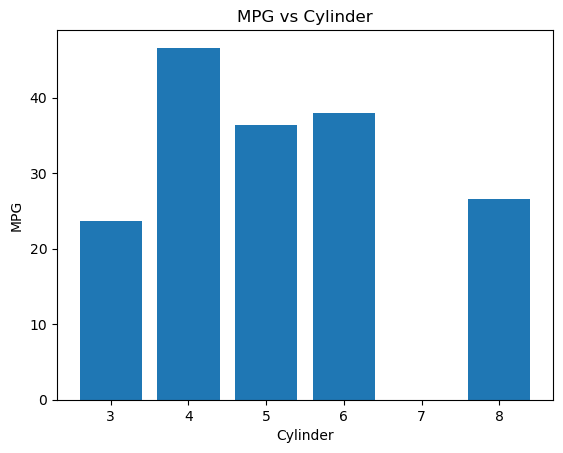

In [14]:
# Create a bar plot of Cylinders vs MPG
plt.bar(data.Cylinders, data.MPG)

plt.title('MPG vs Cylinder')
plt.xlabel('Cylinder')
plt.ylabel('MPG')
plt.show()

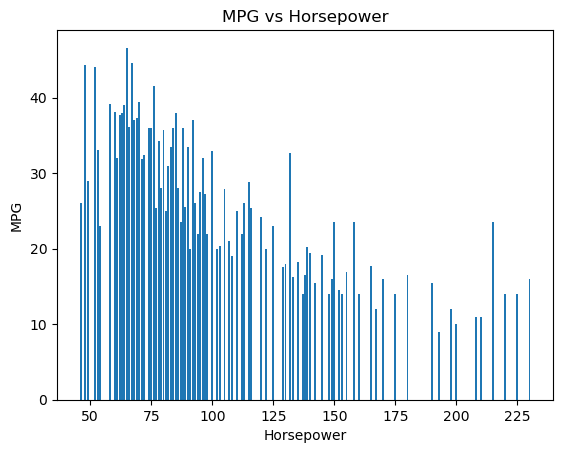

In [15]:
# Create a bar plot of Horsepower vs MPG
plt.bar(data.Horsepower, data.MPG)

plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

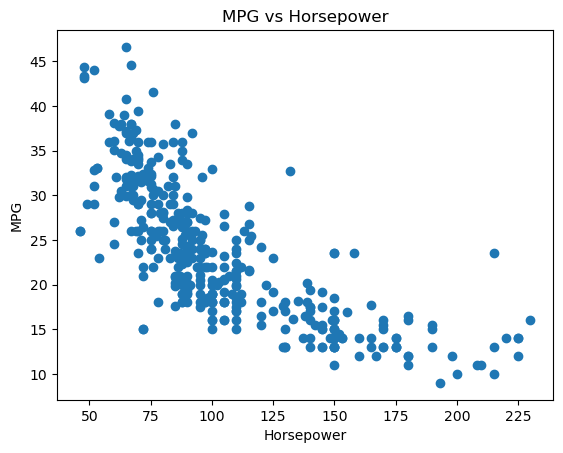

In [17]:
# Create a bar plot of scatter vs MPG
plt.scatter(data.Horsepower, data.MPG)

plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

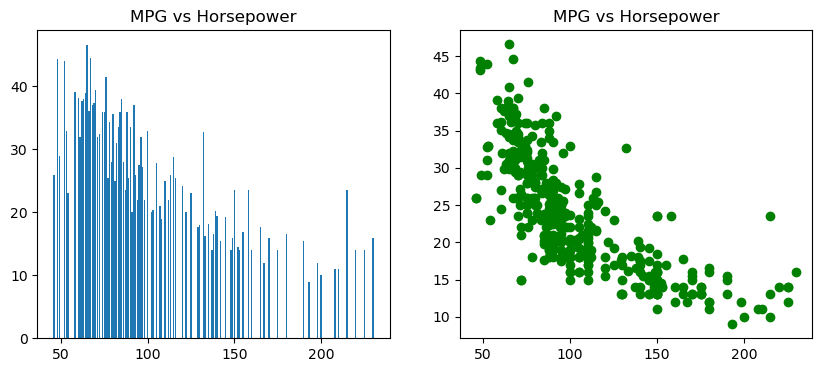

In [26]:
#Creating a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1,2, figsize=(10,4))

# Create a bar plot of Horsepower vs MPG
ax[0].bar(data.Horsepower, data.MPG)
ax[0].set_title('MPG vs Horsepower')


ax[1].scatter(data.Horsepower, data.MPG, color='g')
ax[1].set_title('MPG vs Horsepower')

plt.show()

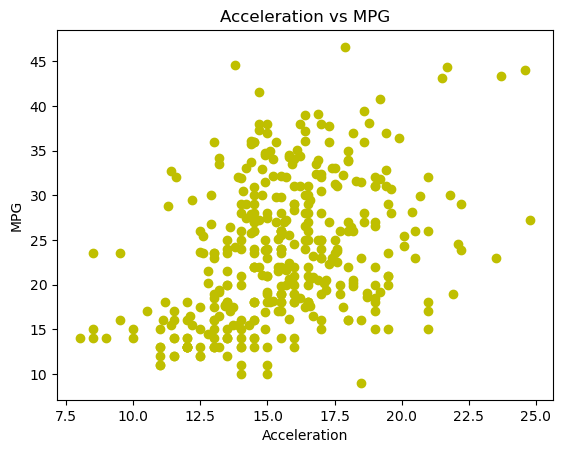

In [27]:
# Create scatter plot MPG vs Acceleration
plt.scatter(data['Acceleration'], data['MPG'], color='y')

plt.title('Acceleration vs MPG')
plt.xlabel('Acceleration')
plt.ylabel('MPG')

plt.show()

Here we can see the the higher the acceleration, the longer the distance covered

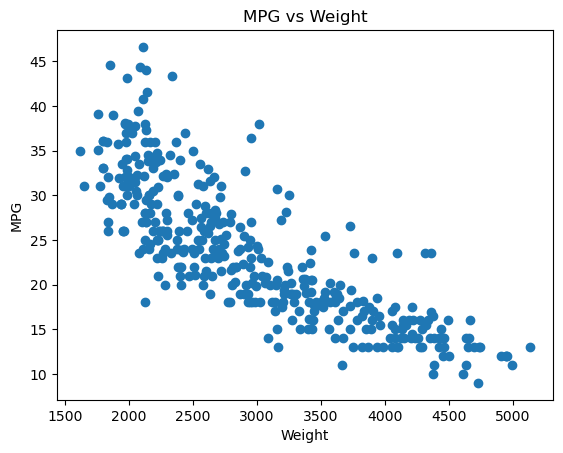

In [28]:
# Create scatter plot MPG vs Weight
plt.scatter(data['Weight'], data['MPG'])

plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.show()

The result above shows that the heavier a vehicle is, the less efficient it is in terms of Miles Per Gallon

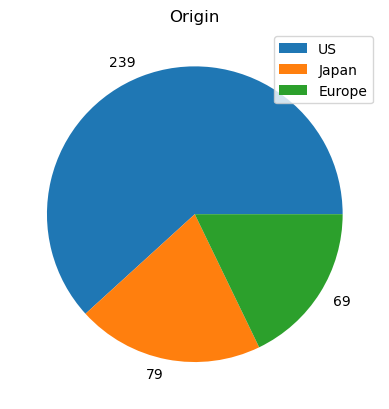

In [31]:
# create a pie plow for the Origin
region_count = data['Origin'].value_counts()
plt.pie(region_count, labels=region_count)

plt.title('Origin')
plt.legend(region_count.keys().tolist())

plt.show()

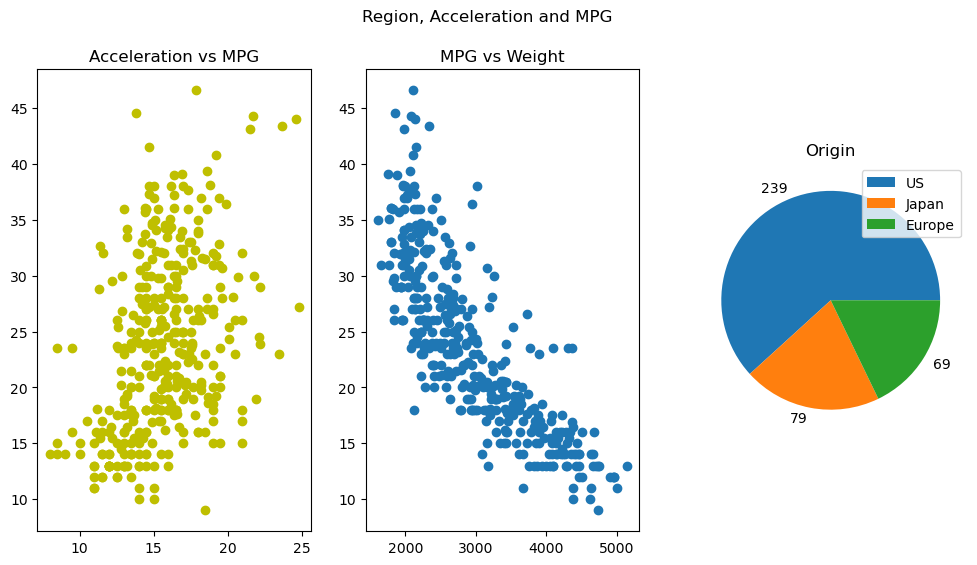

In [34]:
# Create a one row three column subplot
fig, ax = plt.subplots(1,3,figsize=(12,6))

ax[0].scatter(data['Acceleration'], data['MPG'], color='y')
ax[0].set_title('Acceleration vs MPG')
#plt.xlabel('Acceleration')
#plt.ylabel('MPG')

# Create scatter plot MPG vs Weight
ax[1].scatter(data['Weight'], data['MPG'])
ax[1].set_title('MPG vs Weight')
#plt.xlabel('Weight')
#plt.ylabel('MPG')

# create a pie plow for the Origin
region_count = data['Origin'].value_counts()
ax[2].pie(region_count, labels=region_count)
ax[2].set_title('Origin')
ax[2].legend(region_count.keys().tolist())

# Adding an overrall title
fig.suptitle('Region, Acceleration and MPG')

plt.show()


## Getting started with Statistic

Descriptive statistics and data distribution

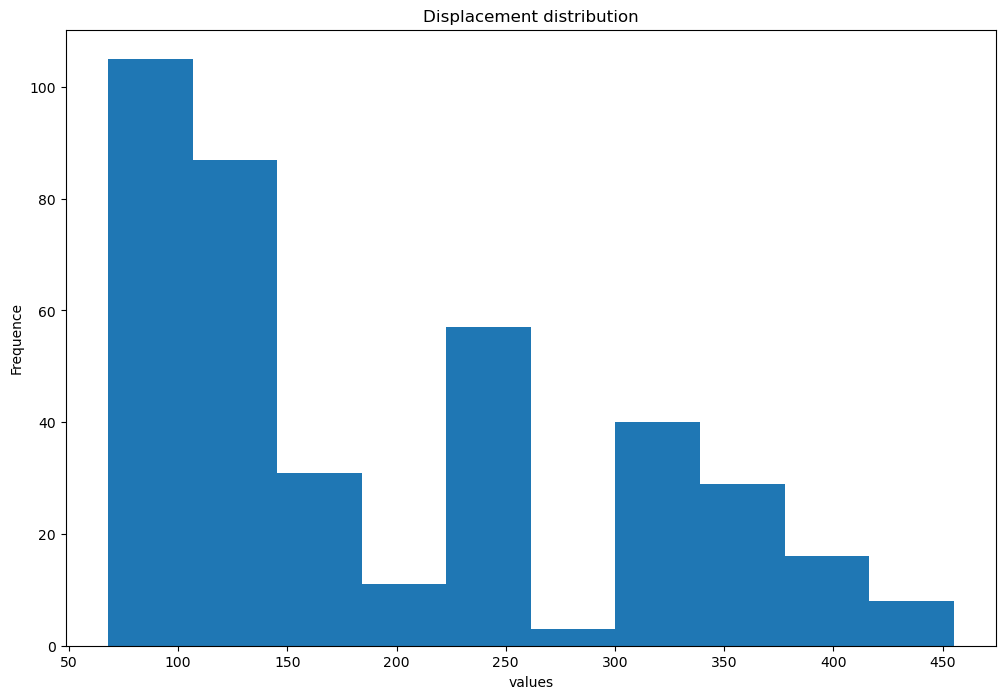

In [35]:
# Check the distribution oh the Displacement
dis_var = data['Displacement']

# Create a figure 
plt.figure(figsize=(12,8))

# plot the histogram
plt.hist(dis_var)

# Add title and labels
plt.title('Displacement distribution')
plt.xlabel('values')
plt.ylabel('Frequence')

# Show the graph
plt.show()

We can see that the Displacement data are not asymmetric, as most of the data is located to the left of the distribution.

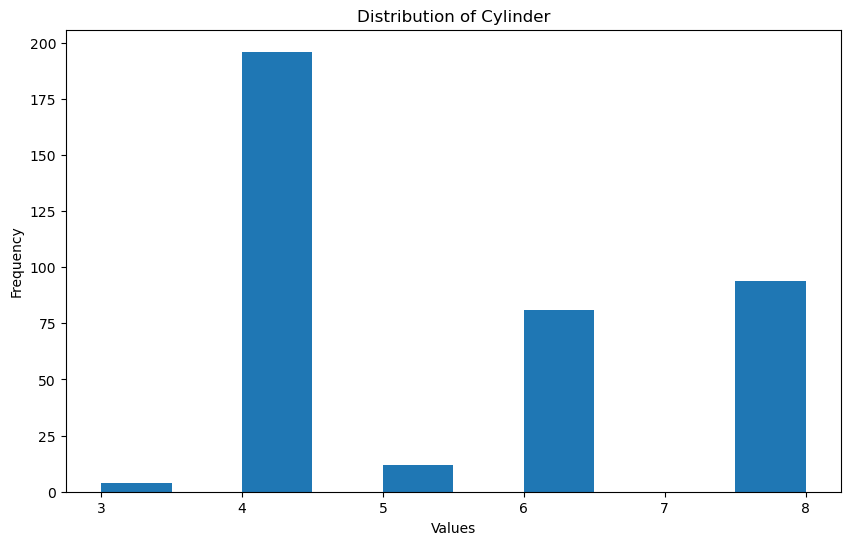

In [36]:
# Check the distribution oh the Cylinders
cyl_var = data['Cylinders']

# Create a figure
plt.figure(figsize=(10,6))

# Create the histogram
plt.hist(cyl_var)

# Add lable and title
plt.title('Distribution of Cylinder')
plt.xlabel('Values')
plt.ylabel('Frequency')

# plt.show the graph
plt.show()

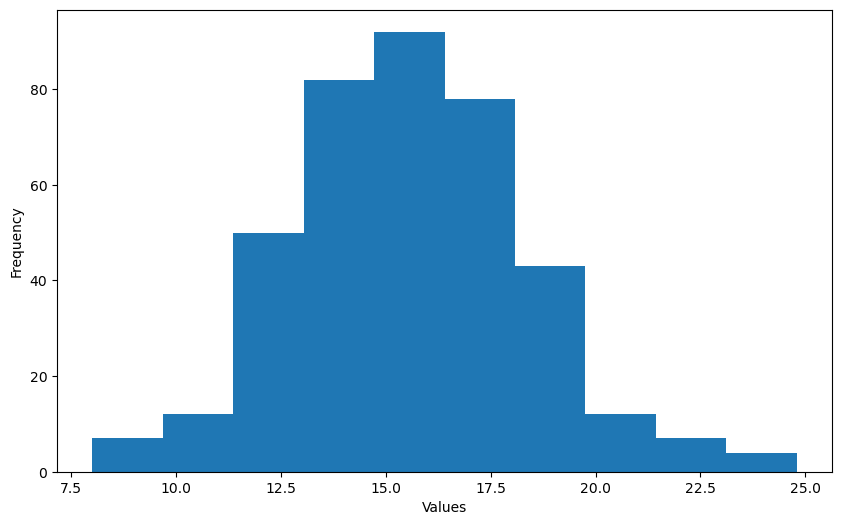

In [38]:
# Create distribution of the Acceleration
# Get the variable
ass_var = data['Acceleration']

# Create a figure
plt.figure(figsize=(10,6))

# Create the histogram
plt.hist(ass_var, label=ass_var)

# Add label and title
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the graph
plt.show()

The above histogram shows that the Acceleration is symmetrical, with most frequently accelerated occurring in the middle of the range with fewer Accelerations occurring on the extreme ends of the scales.

## Measures of Central Tendency

Let us use the acceleration to perfrom statistics

In [42]:
# Get the variable to Examine

acc_var = data['Acceleration']

# Get the statistics
min_acc_var = acc_var.min()
max_acc_var = acc_var.max()
mean_acc_var = acc_var.mean()
med_acc_var = acc_var.median()
mod_acc_var = acc_var.mode()[0]

print('Minimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\n'.format(min_acc_var,max_acc_var,
                                                                                             mean_acc_var,
                                                                                             med_acc_var,
                                                                                             mod_acc_var))

Minimum:8.00
Maximum:24.80
Mean:15.57
Median:15.50
Mode:14.50



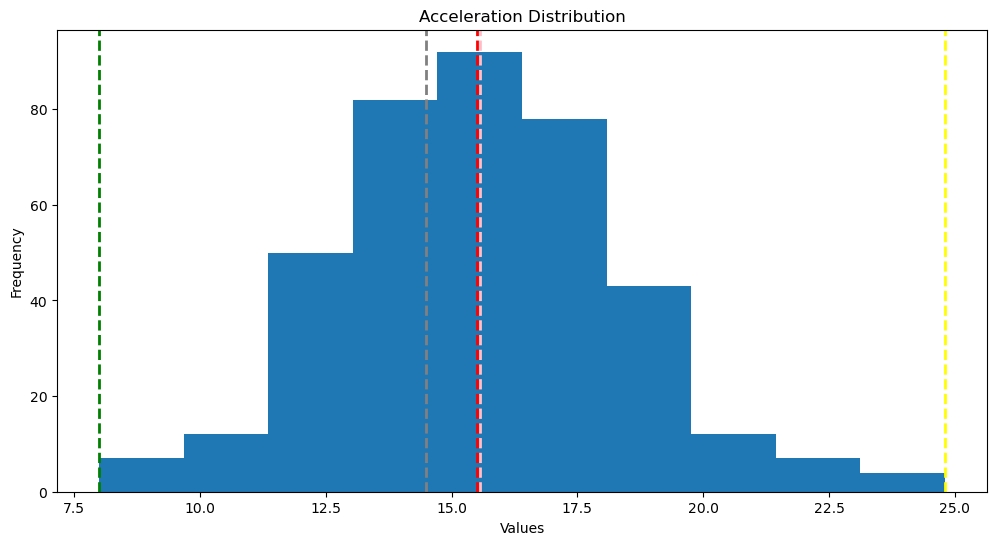

In [44]:
# Create a figure
plt.figure(figsize=(12,6))

# plot the histogram
plt.hist(acc_var)

# Add the statistics line
plt.axvline(x=min_acc_var, color='green', linewidth=2, linestyle='dashed')
plt.axvline(x=max_acc_var, color='yellow', linewidth=2, linestyle='dashed')
plt.axvline(x=med_acc_var, color='red', linewidth=2, linestyle='dashed')
plt.axvline(x=mod_acc_var, color='gray', linewidth=2, linestyle='dashed')
plt.axvline(x=mean_acc_var, color='pink', linewidth=2, linestyle='dashed')

# Add title and lable
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Acceleration Distribution')

plt.show()

We will use boxplot to show the distribution

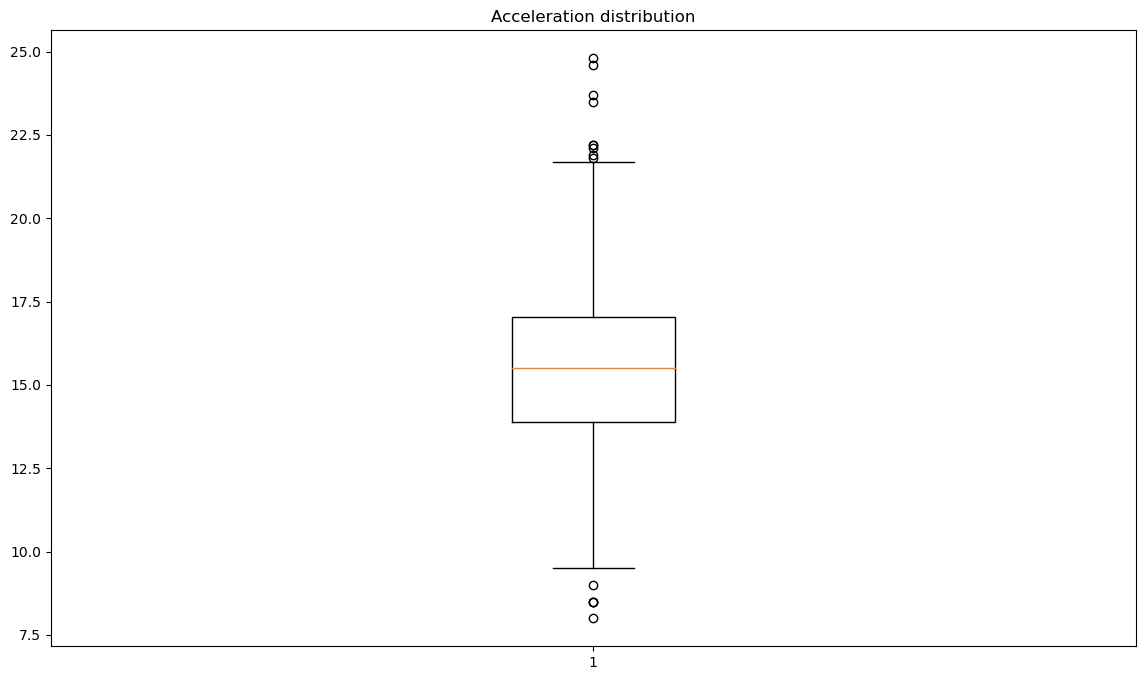

In [45]:
# Create the variable
acc_box_var = data['Acceleration']

# Create a figure
plt.figure(figsize=(14,8))

# create the boxplot
plt.boxplot(acc_box_var)

# Add title
plt.title('Acceleration distribution')

# Show the graph
plt.show()

The boxplot show that half of the acceleration is approximatly 14 and 17. Lets create a function that we can use repeatedly

In [60]:
# Create the function
def data_dist(var_data):
    import matplotlib.pyplot as plt
    
    # Get the statistics
    min_acc_var = acc_var.min()
    max_acc_var = acc_var.max()
    mean_acc_var = acc_var.mean()
    med_acc_var = acc_var.median()
    mod_acc_var = acc_var.mode()[0]
    
    print('Minimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\n'.format(min_acc_var,max_acc_var,
                                                                                             mean_acc_var,
                                                                                             med_acc_var,
                                                                                             mod_acc_var))
    
    # Create a figure for 2 subplot, 2 rows and 1 column
    fig, ax = plt.subplots(2,1,figsize=(14,8))
    
    # plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')


    # Add the statistics line
    ax[0].axvline(x=min_acc_var, color='green', linewidth=2, linestyle='dashed')
    ax[0].axvline(x=max_acc_var, color='yellow', linewidth=2, linestyle='dashed')
    ax[0].axvline(x=med_acc_var, color='red', linewidth=2, linestyle='dashed')
    ax[0].axvline(x=mod_acc_var, color='gray', linewidth=2, linestyle='dashed')
    ax[0].axvline(x=mean_acc_var, color='pink', linewidth=2, linestyle='dashed')

     
    # create the boxplot
    ax[1].boxplot(var_data, vert=False)

    # Add title
    ax[1].set_xlabel('Value')
    
    fig.suptitle('Data Distribution')
    
    # show the graph
    plt.show()    

Minimum:8.00
Maximum:24.80
Mean:15.57
Median:15.50
Mode:14.50



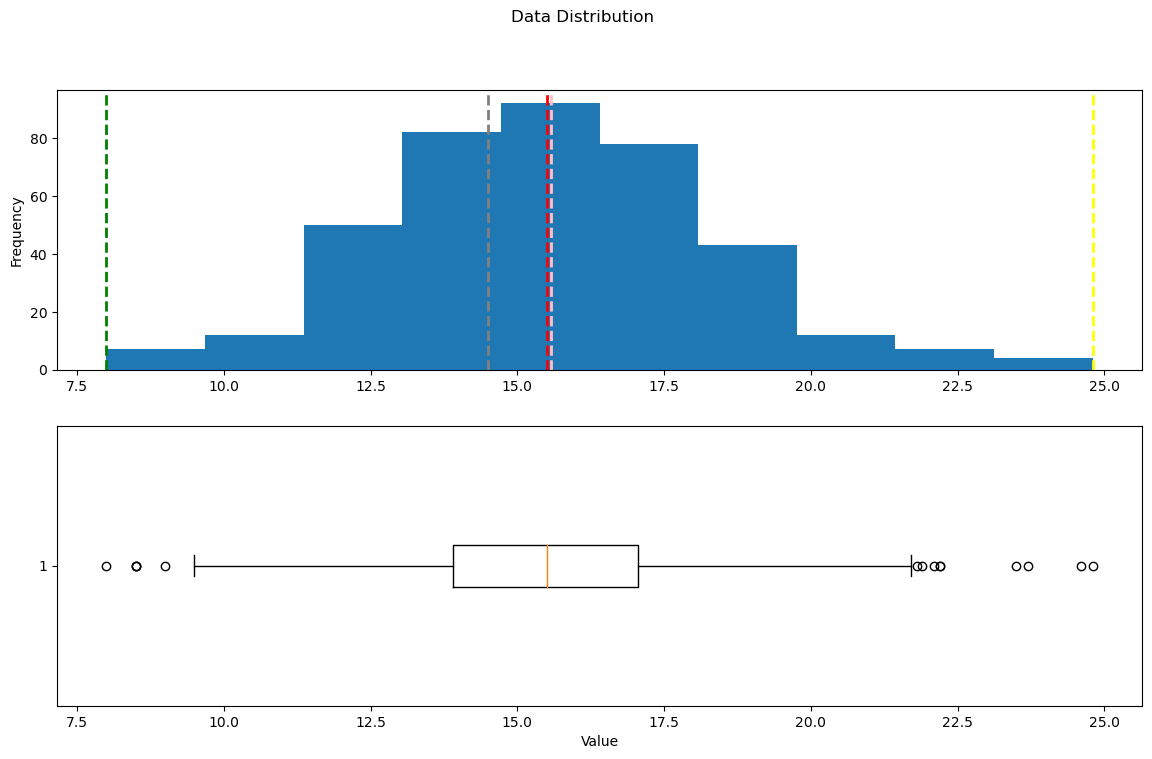

In [61]:
# Get the data
fun_data = data['Acceleration']

# Call the function
data_dist(fun_data)

Though there are outliers on the data, we can consider taking them off by limiting the data. 

## THE END